# SVD

## Preparación del entorno

In [1]:
import numpy as np
from scipy.linalg import svd
from PIL import Image
import matplotlib.pyplot as plt


### a) Usar SVD en una imagen de su preferencia para encontrar las matrices U, Sigma y V:

In [3]:
# Cargar la imagen 
imagen = Image.open('The_City_London.jpg')
imagen = np.array(imagen.convert('L'))  # Convertir la imagen a escala de grises y a una matriz NumPy

# Aplicar SVD a la matriz de la imagen
U, Sigma, Vt = svd(imagen, full_matrices=False)

### b) Truncar las matrices obtenidas en el punto a) para aproximar la matriz original como suma de matrices de rango 1:

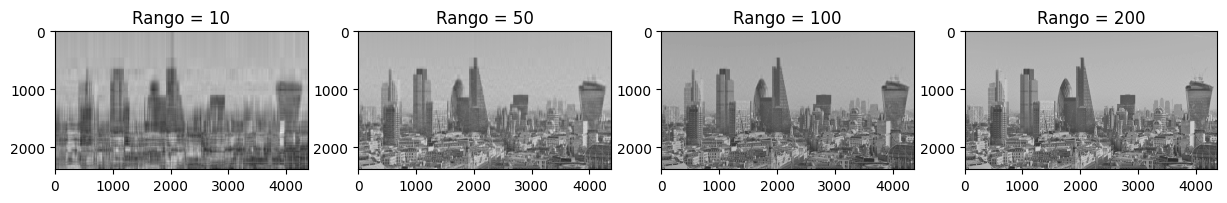

In [4]:
# Definir diferentes valores de rango para truncar las matrices
rangos = [10, 50, 100, 200]


plt.figure(figsize=(15, 6))

for i, rango in enumerate(rangos):
    # Truncar las matrices U, Sigma y Vt
    U_truncado = U[:, :rango]
    Sigma_truncada = np.diag(Sigma[:rango])
    Vt_truncado = Vt[:rango, :]

    # Reconstruir la imagen aproximada
    imagen_aproximada = np.dot(U_truncado, np.dot(Sigma_truncada, Vt_truncado))

    # Mostrar la imagen aproximada
    plt.subplot(1, len(rangos), i + 1)
    plt.imshow(imagen_aproximada, cmap='gray')
    plt.title(f'Rango = {rango}')

plt.show()


### c) Hacer un scatterplot donde los valores del 'eje x' sean el número de rango de la aproximación y el 'eje y' sea la calidad de la aproximación. La calidad de la aproximación se puede evaluar de diversas maneras, como el error cuadrático medio (MSE) o el error absoluto medio (MAE). Aquí hay un ejemplo utilizando el error cuadrático medio:

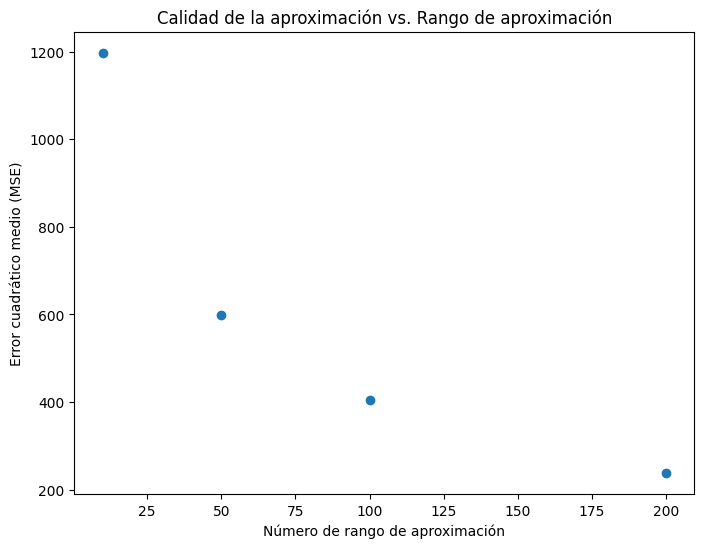

In [5]:
# Calcular el MSE para cada aproximación
mse_valores = []

for rango in rangos:
    U_truncado = U[:, :rango]
    Sigma_truncada = np.diag(Sigma[:rango])
    Vt_truncado = Vt[:rango, :]
    
    imagen_aproximada = np.dot(U_truncado, np.dot(Sigma_truncada, Vt_truncado))
    mse = np.mean((imagen - imagen_aproximada) ** 2)
    mse_valores.append(mse)

# Crear el scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(rangos, mse_valores)
plt.xlabel('Número de rango de aproximación')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('Calidad de la aproximación vs. Rango de aproximación')
plt.show()